## Hierarhično gručenje

Na predavanjih smo spoznali algoritem **hierarhičnega gručenja**.  
Njegova glavna značilnost je, da omogoča primerjavo objektov na podlagi izbrane **mere razdalje** med njimi.  
Zaradi tega podatkov ni nujno predstaviti v vektorskih prostorih.

Algoritem je **determinističen** in ne zahteva, da vnaprej določimo število gruč.  
Struktura gručenja se izračuna enkrat za vse možne številke gruč v intervalu $[1, n]$,  
odločitev o končnem številu gruč pa sprejmemo **naknadno**, na podlagi dendrograma.

Hierarhično gručenje gradi **hierarhijo (drevo)** gruč.  
Na začetku vsaka točka tvori svojo gručo. Nato algoritem postopno združuje najbližji par gruč,  
dokler ne ostane le ena sama gruča.

Rezultat je **dendrogram**, drevesni diagram, ki prikazuje, kako se gruče združujejo korak za korakom.

##### Vprašanje 5-2-1

Kakšna je časovna zahtevnost algoritma za hierarhično gručenje? Kako se primerja z metodo K-means?

## Hierarchical clustering

At the lectures, we learned about the **hierarchical clustering** algorithm.  
Its main characteristic is that it allows comparison of objects based on a defined **distance measure** between them.  
Because of that, data representation is not necessarily limited to vector spaces.

The algorithm is **deterministic** and does not require the number of clusters to be specified in advance.  
The clustering structure is computed once for all possible numbers of clusters in the interval $[1, n]$,  
and the final number of clusters can be decided **afterward**, based on the dendrogram.

Hierarchical clustering builds a **hierarchy (a tree)** of clusters.  
At first, each data point is its own cluster. Then, the algorithm repeatedly merges the two closest clusters until only one remains.

The result is a **dendrogram**, a tree-like diagram that shows how clusters merge step by step.

##### Question 5-2-1

What is the time complexity of the algorithm for hierarchical clustering? How does it compare with the K-means method?

[Odgovor](205-2.ipynb#Odgovor-5-2-1)

[Answer](205-2.ipynb#Answer-5-2-1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
import scipy

### Podatki

<img src="../slike/živali.jpg"></img> 

Današnji podatki spominjajo na (starejši generaciji dobro znani) album sličic z živalmi. Vsebuje 59 živalskih vrst ter 16 atributov, ki opisuje pripadajoče anatomske značilnosti. Živali so razdeljene v 7 razredov.

### Data

<img src="../slike/živali.jpg"></img>

Today's data is reminiscent of (well-known to older generations) an album of animal pictures. It contains 59 animal species and 16 attributes that describe the associated anatomical characteristics. Animals are divided into 7 classes.

In [2]:
data = pd.read_table('../data/zoo.tab', skiprows=[1,2])
print(data.columns)
data.head(5)

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'type', 'name'],
      dtype='object')


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,name
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,mammal,aardvark
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,mammal,antelope
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,fish,bass
3,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,mammal,boar
4,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,mammal,calf


Zanimala nas bodo atributi posameznih živali.

We are interested in the attributes of each animal.

In [3]:
X = data.iloc[:,:16]
Y = data.iloc[:,16]

Rezultat gručenja dobimo z uporabo modula `scipy.cluster.hierarchy` in metode `linkage`. Slednja izračune povezave v drevesu (dendrogramu) glede na dano mero razdalje (`metric`) in načinom merjenja razdalj med gručami (`method`).

The clustering result is obtained using the `scipy.cluster.hierarchy` module and the `linkage` method. The latter calculates the connection in the tree (dendrogram) with respect to a given distance measure (`metric`) and the method of measuring the distance between clusters (`method`).

In [4]:
L = sch.linkage(X, method="average", metric="cityblock")

Z uporabo funkcije `dendrogram` narišemo drevo in mu priredimo oznake. Funkcija deluje v navezi z že znano knjižnico `matplotlib`.

Using the `dendrogram` function, we draw a tree and organize it with labels. The function works in conjunction with the already known `matplotlib` library.

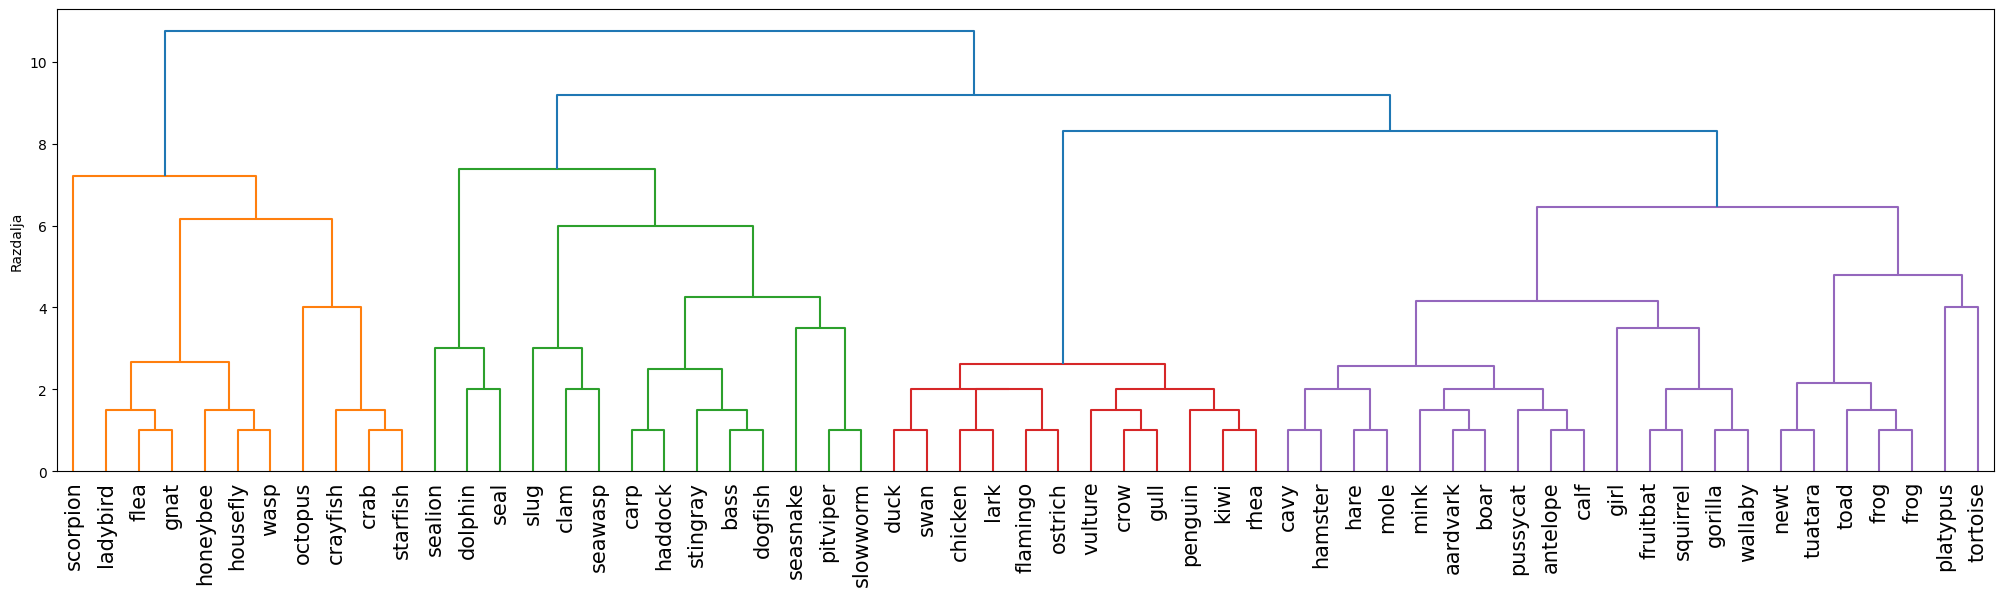

In [5]:
plt.figure(figsize=(25, 6))
labels = data['name'].values
D = sch.dendrogram(L, labels=labels, leaf_font_size=15)
plt.ylabel("Razdalja")
plt.show()

Vsako združevanje v dendrogramu predstavlja združitev dveh gruč.  
**Višina** združitve prikazuje **razdaljo** med gručami.  
Za določitev števila gruč lahko “razrežemo” drevo pri izbrani višini.

Za prvi poizkus bo v redu, a dendrogram vseeno izgleda nekoliko sploščen. Pri metodi lahko spremenimo različne parametre.

Each merge in the dendrogram represents two clusters joining together.  
The **height** of the merge indicates the **distance** between clusters.  
To decide the number of clusters, we can “cut” the tree at a chosen height.

It's okay, for the first try. Nevertheless, the dendrogram seems somewhat flat. We can change various method parameters.

### Metode povezovanja

Metode povezovanja določajo način, kako izračunati razdaljo med dvema poljubno velikima gručama točk.
* **Posamično povezovanje** (method="single"); Razdalja med gručama je razdalja med najbližjima točkama gruč.
* **Povprečna razdalja** (method="average"); Povprečna razdalja med vsemi pari točk. 
* **Razdalja med središčema** (method="centroid"); Izračuna središči gruč v prostoru ter njuno medsebojno razdaljo. Mera razdalje je nujno evklidska.
* In še mnogo drugih.

##### Vprašanje 5-2-2

Preizkusi različne oblike dendrograma glede na izbrano metodo povezovanja.

### Linkage methods

Linkage methods determine how to calculate the distance between two arbitrarily large points points.

* **Single linkage** (method = "single"); The distance between the clusters is the distance between the closest points of the clusters.
* **Average linkage** (method = "average"); The average distance between all pairs of points.
* **Centroid linkage** (method = "centroid"); Calculates the centers of clusters in the space and their mutual distance. The distance measure is necessarily Euclidean.
* And many others.

##### Question 5-2-2

Test various forms of the dendrogram with respect to the selected linkage method.

[Odgovor](205-2.ipynb#Odgovor-5-2-2)

[Answer](205-2.ipynb#Answer-5-2-2)

Ali je evklidska razdalja res najbolj primeren način primerjanja atributov, ki so diskretni? Ne vedno.

Is the Euclidean distance really the best way to compare attributes that are discrete? Not always.

### Mere razdalje

Način določanja interpretacije razdalje med točkama $\vec{x} = (x_1, x_2, ..., x_p)$ in $\vec{y} = (y_1, y_2, ..., y_p)$ vpliva na rezultat hierarhičnega gručenja. Izbira ustrezne mere je odvisna od narave podatkov in čimbolje odgovarja na vprašanje: *kaj pomeni, da sta dva primera podobna?*

Na izbiro ustrezne mere lahko vplivajo:
* Prisotnost manjkajočih vrednosti
* Predstavitev podatkov (vektorji, nizi znakov, slike, ...)
* Tip atributov in interpretacija vrednosti


Nekaj pogostih mer razdalje:
* Evklidska razdalja `(metric="euclidean")`

$$ d(\vec{x}, \vec{y}) = \sqrt{(x_1-y_1)^2 + (x_2 - y_2)^2 + ... + (x_p - y_p)^2} $$

* Manhattanska razdalja `(metric="cityblock")`

$$ d(\vec{x}, \vec{y}) = |x_1-y_1| + |x_2 - y_2| + ... + |x_p - y_p| $$

* Kosinusna razdalja `(metric="cosine")`

Predstavlja *kosinus kota* med vektorjema $\vec{x}$ in $\vec{y}$ - manjši kot pomeni večjo podobnost. Uporabna za primerjavo podobnosti med vektorji, neupoštevajoč absolutnih velikosti.

$$ d(\vec{x}, \vec{y}) = 1 - \frac{\vec{x} \cdot \vec{y}}{\|\vec{x}\| \|\vec{y}\|} $$

* Jaccardov index `(metric="jaccard")`

Izmeri delež ujemanj med pari soležnih komponent $(x_i, y_i)$, kjer je vsaj ena izmed vrednosti $x_i$ ali $y_i$ večja od nič. Primerna za uporabo v primerih, ko imamo opravka z manjkajočimi vrednostmi ali diskretnimi atributi.

Popoln spisek razdalj najdeš v [dokumentaciji]("https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html").

Poizkusi se spomniti vrste podatkov, kjer bi bilo smiselno uporabiti vsako posamezno mero.

##### Vprašanje 5-2-3

Preizkusi različne oblike dendrograma glede na izbrano mero razdalje.

###  Distance measures

The method of determining the interpretation of the distance between the points $\vec{x} = (x_1, x_2, ..., x_p)$ and $\vec{y} = (y_1, y_2, ..., y_p)$ affects the result of hierarchical clustering. Choosing the right size depends on the nature of the data and answers the question as much as possible: *what does it mean when two examples are similar?*

The choice of the appropriate measure may be affected by:

* The presence of missing values
* Data presentation (vectors, character strings, images, ...)
* Attributes type and interpretation of values


Some common distance measures:
* Euclidean distance `(metric = "euclidean")`

$$ d(\vec{x}, \vec{y}) = \sqrt{(x_1-y_1)^2 + (x_2 - y_2)^2 + ... + (x_p - y_p)^2} $$

* Manhattan distance `(metric = "cityblock")`

$$ d(\vec{x}, \vec{y}) = |x_1-y_1| + |x_2 - y_2| + ... + |x_p - y_p| $$

* Cosine distance `(metric = "cosine")`

Represents the *cosine of the angle* between the $\vec{x}$ and $\vec{y}$ vectors - smaller angle means greater similarity. Useful for comparing the similarities between vectors, disregarding their absolute size.

$$ d(\vec{x}, \vec{y}) = 1 - \frac{\vec{x} \cdot \vec{y}}{\|\vec{x}\| \|\vec{y}\|} $$

* Jaccard index `(metric = "jaccard")`

Measures the proportion of matches between $(x_i, y_i)$ pairs at the same positions, where at least one of the values $x_i$ or $y_i$ is greater than zero. Suitable for use in cases where we are dealing with missing values or discrete attributes.

Find the complete list of distances in the [documentation]("https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html").

Try to think of the type of data where it would be sensible to use each single measure.

##### Question 5-2-3

Test various forms of the dendrogram with respect to the selected distance measure.

[Odgovor](205-2.ipynb#Odgovor-5-2-3)

[Answer](205-2.ipynb#Answer-5-2-3)

### Določanje števila gruč

Koliko gruč je v podatkih? Na to vprašanje je težko odgovoriti in tudi sicer velja za odprto vprašanje na področju storjnega učenja. Vseeno poznamo nekaj kazalcev, ki jih v grobem delimo na 
* **nadzorovane** (znani so resnični razredi podatkov)
* **nenadzorovane** (znane so samo značilke in/ali razdalje med primeri)

Za določitev pripadnosti primerov gručam uporabimo funkcijo `fcluster`. Slednja prejme parameter `t`, ki določa razdaljo pri kateri *odsekamo* dendrogram, t.j. odstranimo vse povezave, ki so daljše od dane dolžine. Preostale povezane komponente grafa dendrograma tako tvorijo skupine.

### Determining the number of clusters

How many clusters are in the data? It is difficult to answer this question and it is also considered an open question in the field of machine learning. Nevertheless, we know some of the indicators that we roughly divide on
* **supervised** (true data classes are known)
* **unsupervised** (only the characteristics and/or distance between the examples are known)

To determine the belonging of examples to clusters, we use the `fcluster` function. The latter receives the `t` parameter, which determines the distance at which we *cut* the dendrogram, i.e. remove all links that are longer than a given length. The remaining related components of the dendrogram graph thus form groups.

In [6]:
L = sch.linkage(X, method="average", metric="cityblock")   
t = 3.5
predictions = sch.fcluster(L, t=t, criterion="distance").ravel()
classes = data['type'].values 

data['cluster'] = predictions
data[["name", "type", "cluster"]].head(10)

,name,type,cluster
0,aardvark,mammal,10
1,antelope,mammal,10
2,bass,fish,7
3,boar,mammal,10
4,calf,mammal,10
5,carp,fish,7
6,cavy,mammal,10
7,chicken,bird,9
8,clam,invertebrate,6
9,crab,invertebrate,2


Ponovno narišemo dendrogram in ga <i>odsekamo</i> pri dani razdalji. V nadaljevanju si bomo ogledali številske ocene uspešnosti gručenja.

Re-draw the dendrogram and <i>cut</i> it at the given distance. Below we'll see a number of estimates of clustering performance.

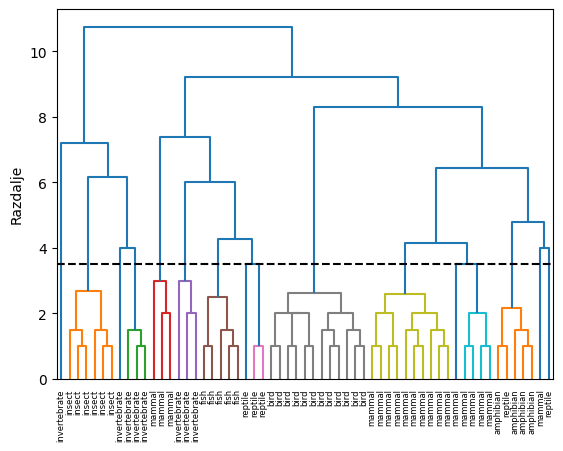

In [7]:
D = sch.dendrogram(L, color_threshold=t, labels=classes)
plt.axhline(y=t, color='black', linestyle='--')
plt.ylabel("Razdalje")
plt.show()

#### Skupna deljena informacija

Mera skupne deljene informacije je uporabna, ko so na voljo informacije o resničnih razredih, v katere spadajo primeri. Pri tem ni odveč poudariti, da resnični razredi ne smejo biti uporabljeni pri deljenju primerov v skupine.

Naključne dodelitve oznak gruč imajo vrednost skupne deljene informacije 
blizu `0.0` za vsako vrednost števila skupin in števila primerov. Popolno ujemanje gruč z obstoječimi razredi ima vrednost `1`.
Mera ni odvisna od predstavitve podatkov, t.j. ni potrebno da so podatki v vektorskem prostoru, saj je odvisna samo od oznak.

#### Common shared information

The measure of common shared information is useful when information on the real classes, which includes examples, is available. It is not unreasonable to emphasize that real classes should not be used in case sharing.

Random assignments of cluster labels have the value of the total shared information
close to `0.0` for each value of the number of groups and number of cases. The complete clustering of clusters with existing classes has a value of `1`.
The measure does not depend on the presentation of data, i.e. it is not necessary to have data in the vector space, as it depends only on labels.

In [8]:
from sklearn.metrics import adjusted_mutual_info_score
score = adjusted_mutual_info_score(classes, predictions)
score

0.7740027756527372

##### Vprašanje 5-2-4

Preveri, kako se ocena spreminja glede na izbrano razdaljo za rezanje dendrograma.

##### Question 5-2-4

Check how the rating changes in regards to the distance where we cut the dendrogram.

[Odgovor](205-2.ipynb#Odgovor-5-2-2)

[Answer](205-2.ipynb#Answer-5-2-2)

##### Vprašanje 5-2-5

Izvedi analizo gručenja na podatkih o živalih  tako, da izbereš ustrezno metodo povezovanja, mero razdalje in število gruč. Uporabi eno od predstavljenih mer podobnosti ter poišči tako kombinacijo omenjenih nastavitev, da bo rezultat gručenja karseda visok.

##### Question 5-2-5

Perform a clustering analysis on animal data by selecting the appropriate linking method, distance measure, and number of clusters. Use one of the similarity measures presented and find a combination of the above settings so that the clustering result is as high as possible.

[Odgovor](205-2.ipynb#Odgovor-5-2-3)

[Answer](205-2.ipynb#Answer-5-2-3)